# Run this before anything starts

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io
import pandas as pd
import cv2 as cv
from PIL import Image
import pickle
import random
from numpy import savetxt

# (Optional) Load  sample FMC data from .mat file

In [5]:
mat = scipy.io.loadmat('timeTraces.mat')
fmc = mat['timeTraces']

print(list(fmc.shape))
print(type(fmc))

[4472, 16, 16]
<class 'numpy.ndarray'>


(895, 256)


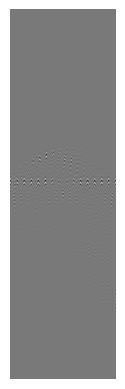

In [7]:
fmc = fmc.reshape(4472, 16 * 16)
fmc = fmc[0::5]/(10**-14) * 255
print(fmc.shape)


plt.imshow(fmc, cmap='gray')
plt.axis('off')
plt.savefig('fmc_image_plt.png')

# Create training data (OUTDATED, check create_training_data.py)

VERY VERY USEFUL VIDEO TUTORIAL!!!\
https://www.youtube.com/watch?v=j-3vuBynnOE

In [38]:
def read_gray_image(dirName, imageName, plotting = False):
    
    image = cv.imread(f'{dirName}/{imageName}', cv.IMREAD_GRAYSCALE)
    print(f'The shape of the GREYSCALE image is {image.shape}')
    if plotting == True:
        plt.imshow(image, cmap='gray')
        plt.axis('off')
        plt.show()
    return image

# read image test
index = 1
dirName_pic = '/Users/chenkangan/PycharmProjects/ME4_FYP_py/py_output_fig'
imgName = f'defect_{index}_yshift_60.png'
image = read_gray_image(dirName_pic, imgName, plotting = False)

In [12]:
def create_training_data(subsample = True):
    training_data = []
    dirName_fmc = '/Users/chenkangan/Desktop/ME4_FYP/imageGenerate_2022/FMC_variable'
    dirName_pic = '/Users/chenkangan/PycharmProjects/ME4_FYP_py/py_output_fig'
    
    for index in range(1,2001):
        filename = f'fmc_{index}.mat'
        imgName = f'defect_{index}_yshift_60.png'
        
        mat = scipy.io.loadmat(f'{dirName_fmc}/{filename}')
        fmc = mat['timeTraces']
        
        if subsample == True:
            fmc = fmc[0::5]
        else:
            pass
        
        image = read_gray_image(dirName_pic, imgName, plotting = False)
        # I need to append ([fmc, label])
        training_data.append([fmc, image, index])
        
    pickle_out = open("training_data_subsampled.pickle","wb")
    pickle.dump(training_data, pickle_out)
    pickle_out.close()
        
    return training_data
        
# subsample every 5th data
# training_data = create_training_data(subsample = True)

# Store training data in a pickle

https://pythonprogramming.net/loading-custom-data-deep-learning-python-tensorflow-keras/

In [57]:
import pickle

pickle_out = open("training_data.pickle","wb")
pickle.dump(training_data, pickle_out)
pickle_out.close()

# x contains training data and y contains the label

# pickle_out = open("x.pickle","wb")
# pickle.dump(x, pickle_out)
# pickle_out.close()

# pickle_out = open("y.pickle","wb")
# pickle.dump(y, pickle_out)
# pickle_out.close()

# Load training data from a pickle and check the result

### 1. Load training_data_subsampled.pickle

In [5]:
pickle_in = open("training_data_subsampled.pickle","rb")
train_data = np.array(pickle.load(pickle_in), dtype=object)
print(f'The shape of entire training dataset: {train_data.shape}')
print(f'The shape of a dataset: {train_data[1].shape}')
print(f'The shape of a matrix: {train_data[1][0].shape}')
print(f'The shape of an image: {train_data[1][1].shape}')
print(f'The type of an index: {type(train_data[1][2])}')

The shape of entire training dataset: (2000, 3)
The shape of a dataset: (3,)
The shape of a matrix: (895, 16, 16)
The shape of an image: (180, 240)
The type of an index: <class 'int'>


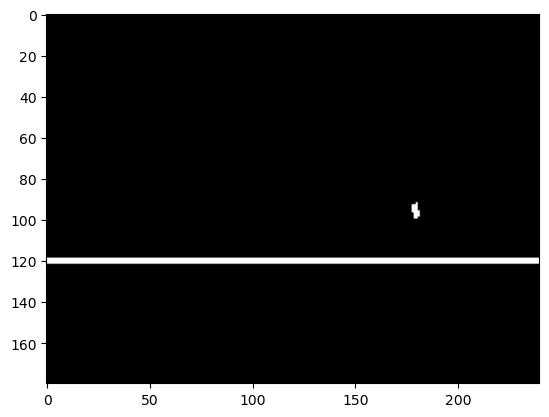

In [53]:
plt.imshow(train_data[100][1], cmap='gray')

Apply scaler on fmc data:
https://stackoverflow.com/questions/50125844/how-to-standard-scale-a-3d-matrix

Random number is 624!
The lucky index is 625!
The random number != index because the 0-index issue that python has.


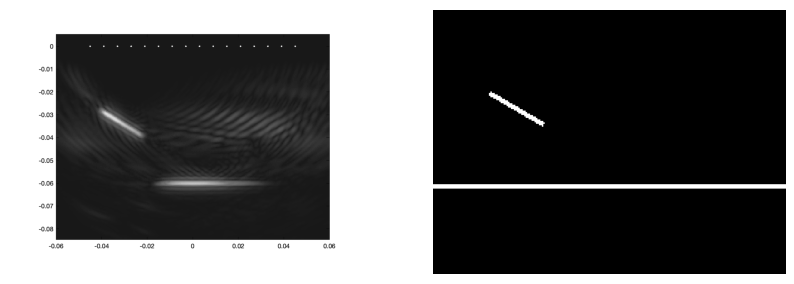

The random column plotted is 10


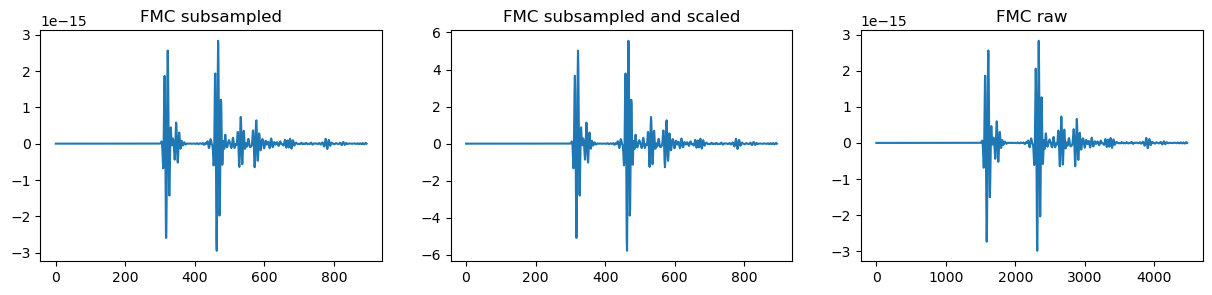

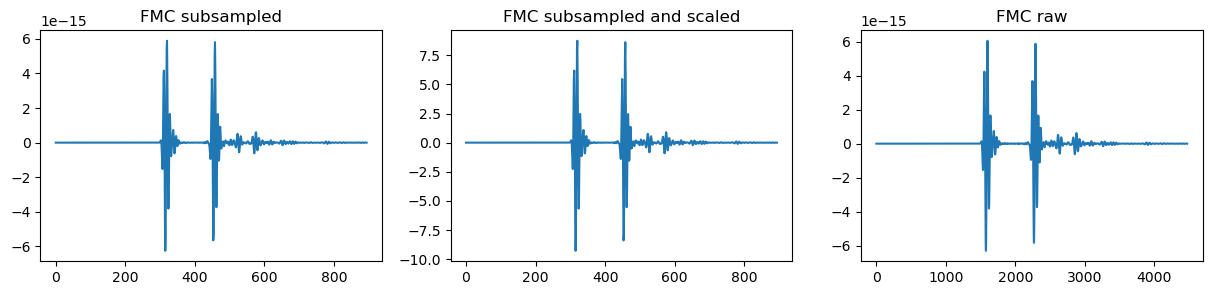

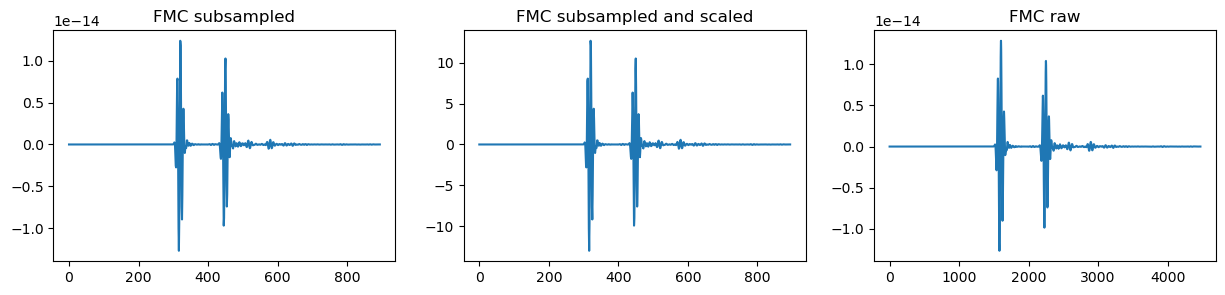

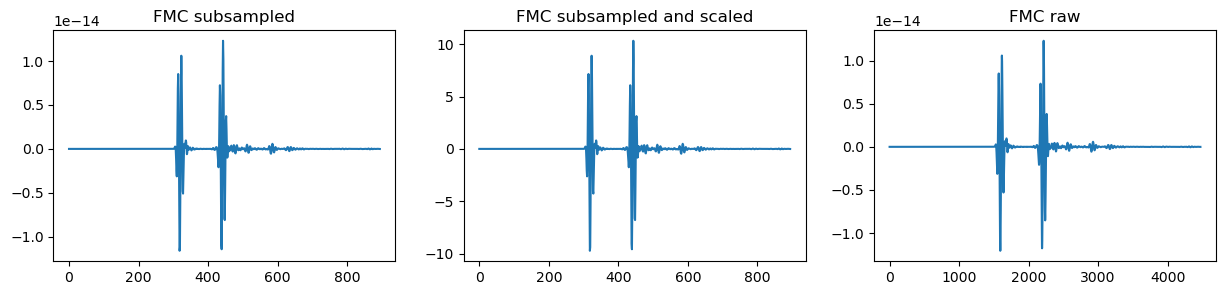

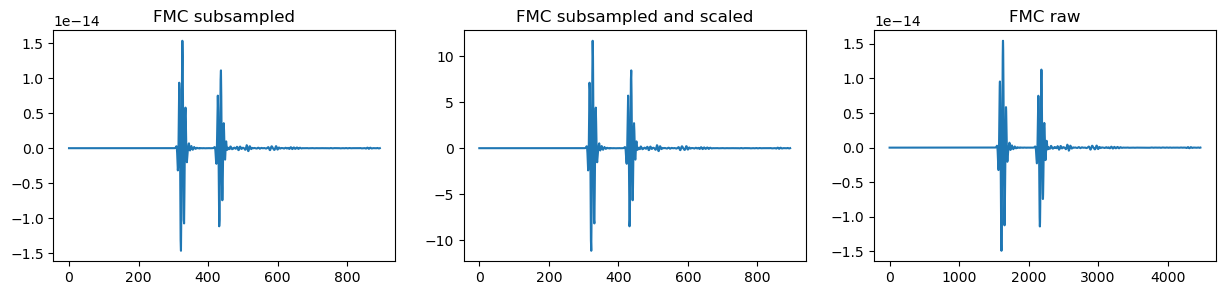

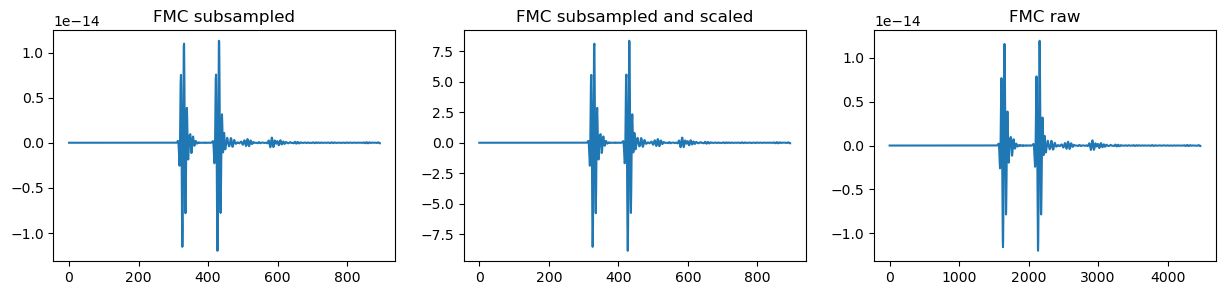

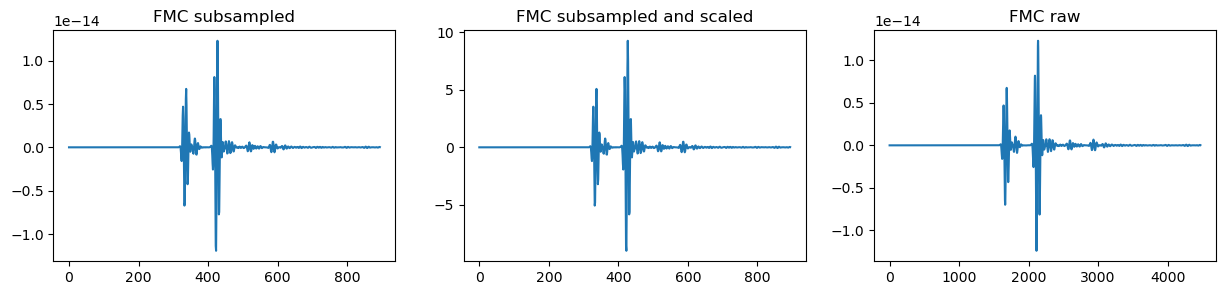

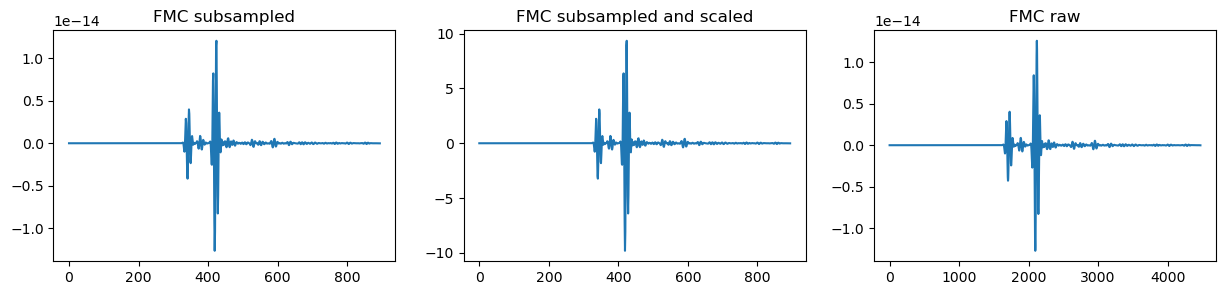

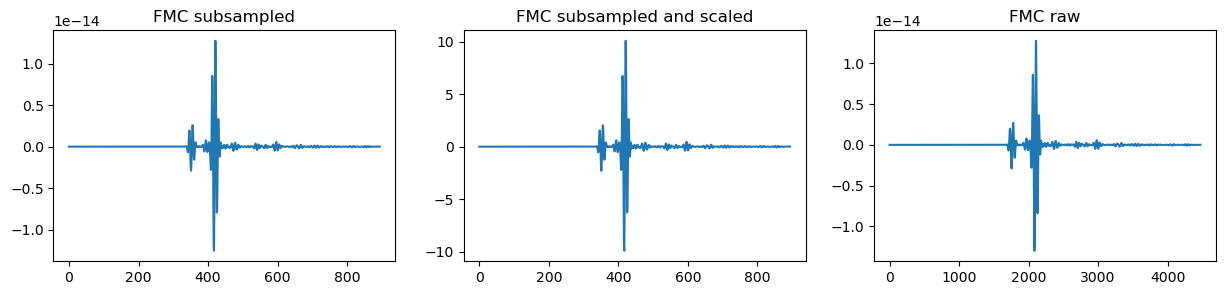

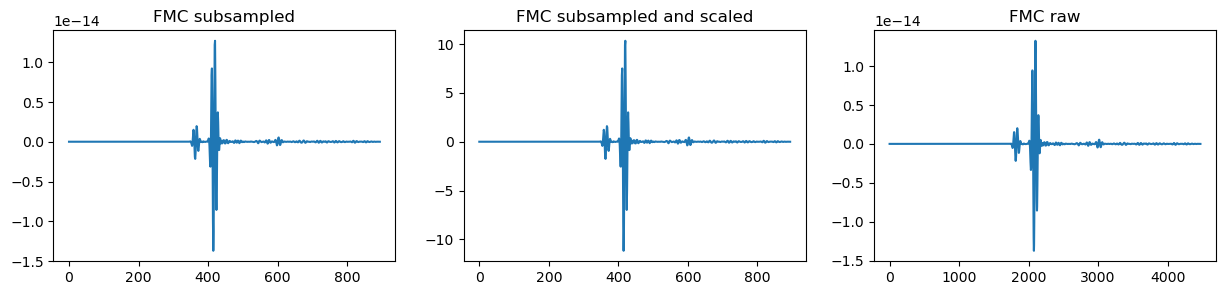

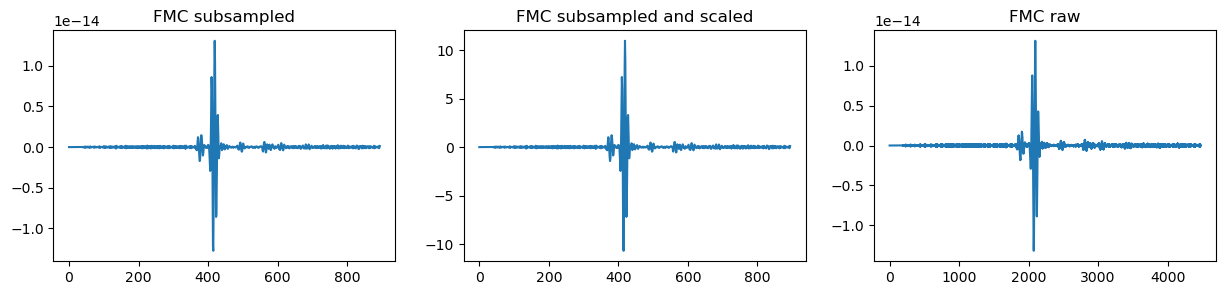

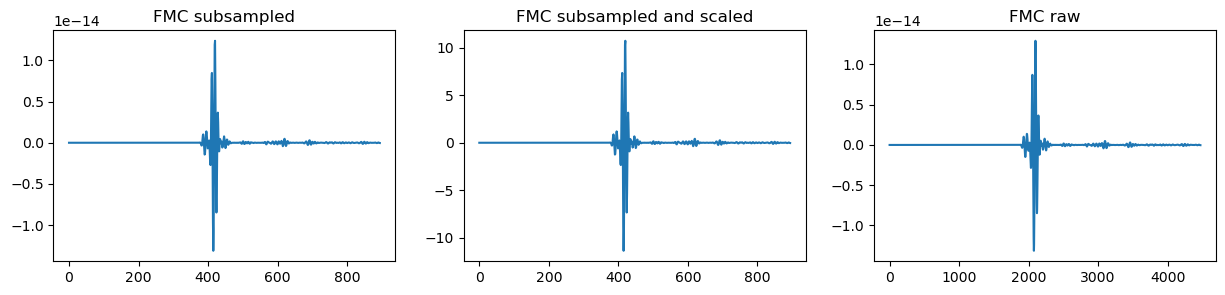

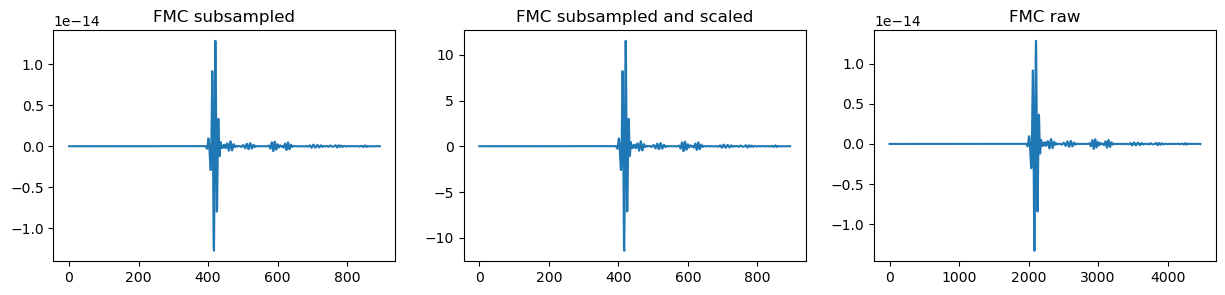

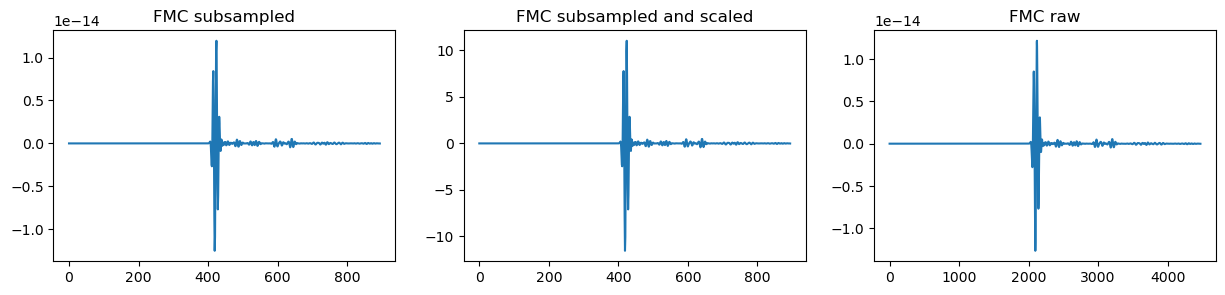

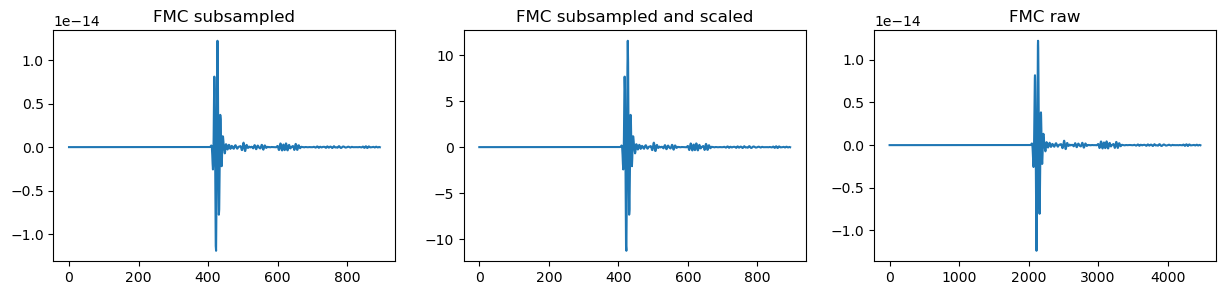

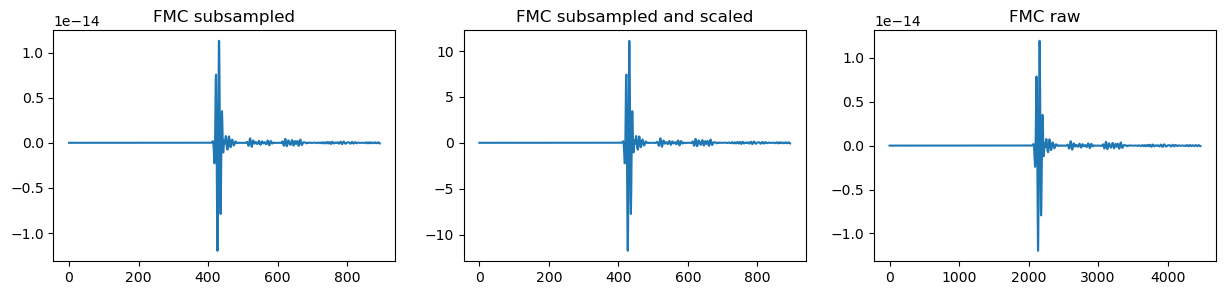

In [19]:
# test whether the data a stored properly

from sklearn.preprocessing import MinMaxScaler, StandardScaler
# scaler = MinMaxScaler()
scaler = StandardScaler()

rand_num = random.randint(1,2001)
print(f'Random number is {rand_num}!')

dirName_das_fmc = "/Users/chenkangan/Desktop/ME4_FYP/imageGenerate_2022/DAS_Figure_FMC"
dirName_fmc = "/Users/chenkangan/Desktop/ME4_FYP/imageGenerate_2022/FMC_variable"

index = train_data[rand_num][2]
print(f'The lucky index is {index}!')
print('The random number != index because the 0-index issue that python has.')

f = plt.figure(figsize=(10,4))

# Read image in greyscale 
image_das_fmc = cv.imread(f'{dirName_das_fmc}/Figure_{index}_fmc.png',cv.IMREAD_GRAYSCALE)  # convert to array

ax = f.add_subplot(121)
ax2 = f.add_subplot(122)
ax.imshow(image_das_fmc, cmap='gray')
ax.axis('off')
ax2.imshow(train_data[rand_num][1], cmap='gray')
ax2.axis('off')
plt.show()

fmc_select = train_data[rand_num][0]
# print(fmc_select.shape[-1])

# !!! Scale function !!!! NEED TO DOUBLE CHECK !!!!! 
fmc_select_scale = scaler.fit_transform(fmc_select.reshape(-1, fmc_select.shape[-1])).reshape(fmc_select.shape)

filename = f'fmc_{index}.mat'
mat = scipy.io.loadmat(f'{dirName_fmc}/{filename}')
# fmc_raw is not subsampled
fmc_raw = mat['timeTraces']

# plot a random column
rand_col = random.randint(0,15)
print(f'The random column plotted is {rand_col}')

for i in range(0,16):    
    f = plt.figure(figsize=(15,3))
    ax = f.add_subplot(131)
    ax2 = f.add_subplot(132)
    ax3 = f.add_subplot(133)
    ax.set_title('FMC subsampled')
    ax.plot(fmc_select[:,rand_col,i])
    ax2.set_title('FMC subsampled and scaled')
    ax2.plot(fmc_select_scale[:,rand_col,i])
    ax3.set_title('FMC raw')
    ax3.plot(fmc_raw[:,rand_col,i])
    plt.show()


### 2. Load training_data_subsampled_x and y.pickle (Update 22/2/23)

In [2]:
pickle_in = open("data_subsampled_no_backwall_crop_3500_X.pickle","rb")
X = np.array(pickle.load(pickle_in), dtype=object)
print(f'The shape of entire training dataset: {X.shape}')
print(f'The shape of a dataset: {X[1].shape}')

The shape of entire training dataset: (3500, 895, 16, 16, 1)
The shape of a dataset: (895, 16, 16, 1)


In [3]:
pickle_in = open("data_subsampled_no_backwall_crop_3500_y.pickle","rb")
y = np.array(pickle.load(pickle_in), dtype=object)
print(f'The shape of entire training dataset: {y.shape}')
print(f'The shape of a dataset: {y[1].shape}')

The shape of entire training dataset: (3500, 120, 240)
The shape of a dataset: (120, 240)


Random number is 877!
Image size after is (60, 120) after resizing 50%


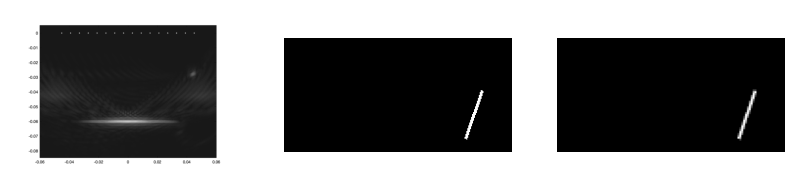

The random column plotted is 11


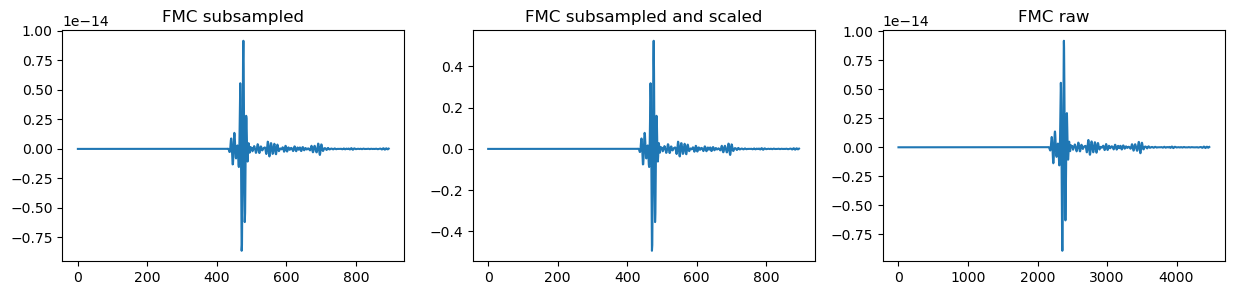

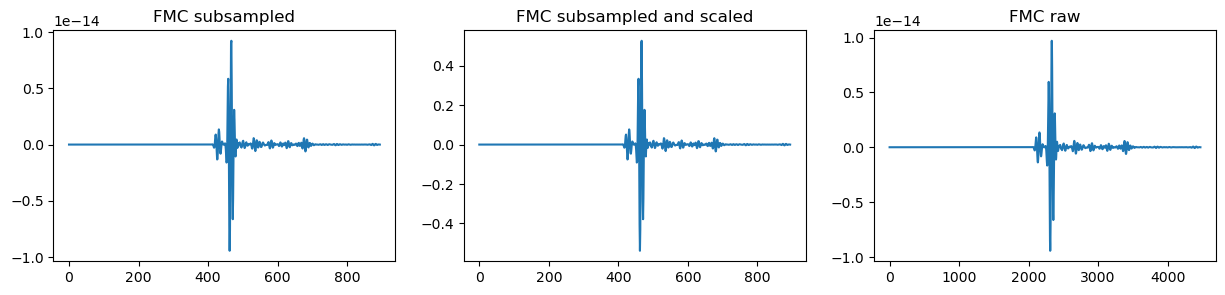

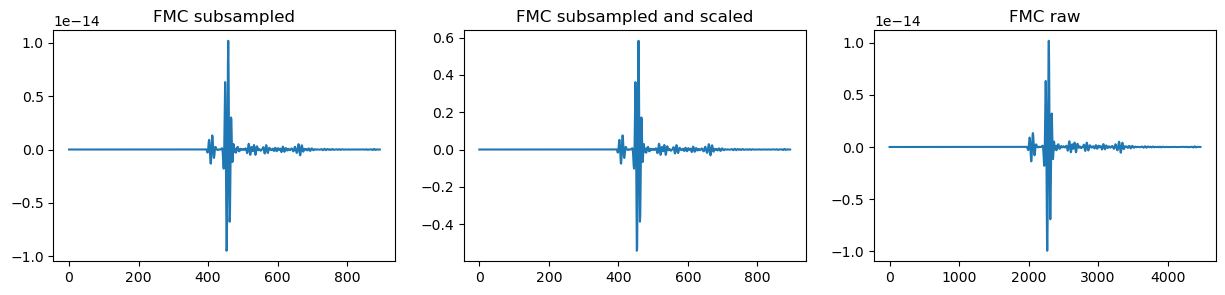

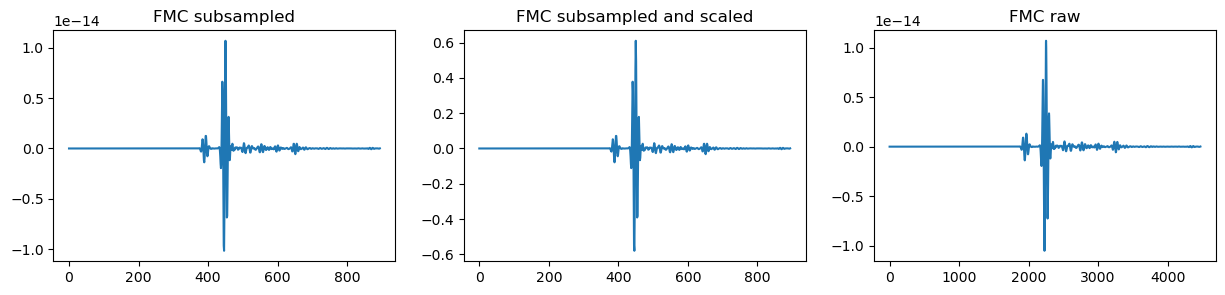

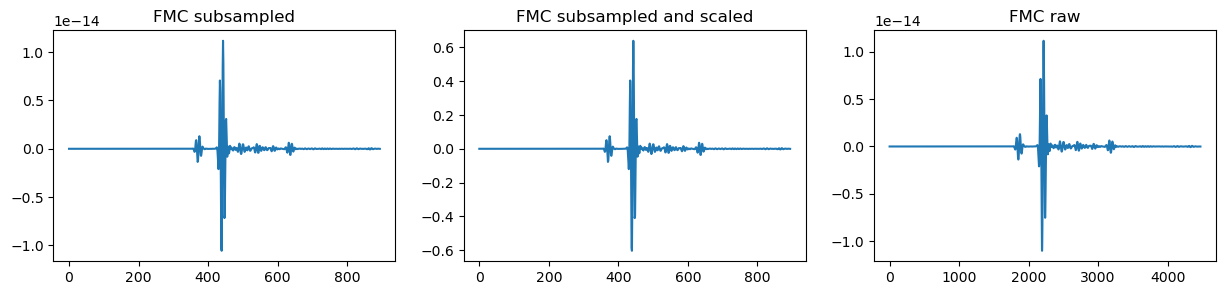

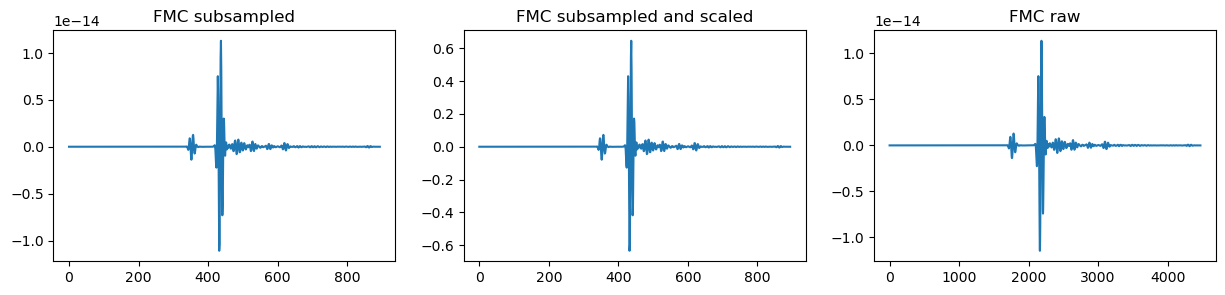

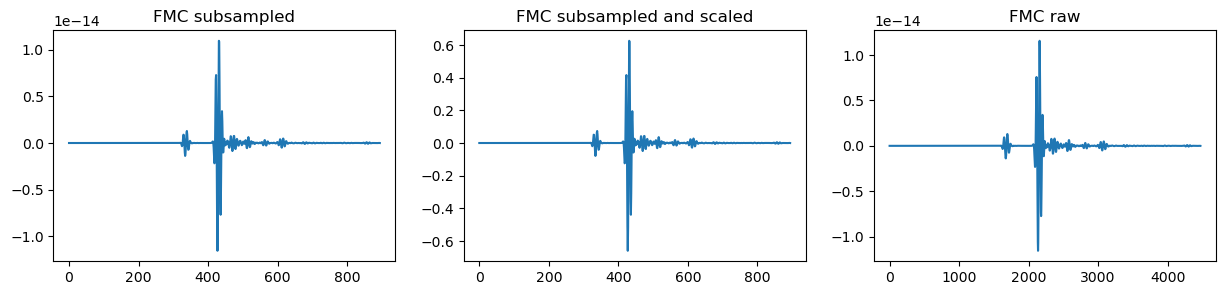

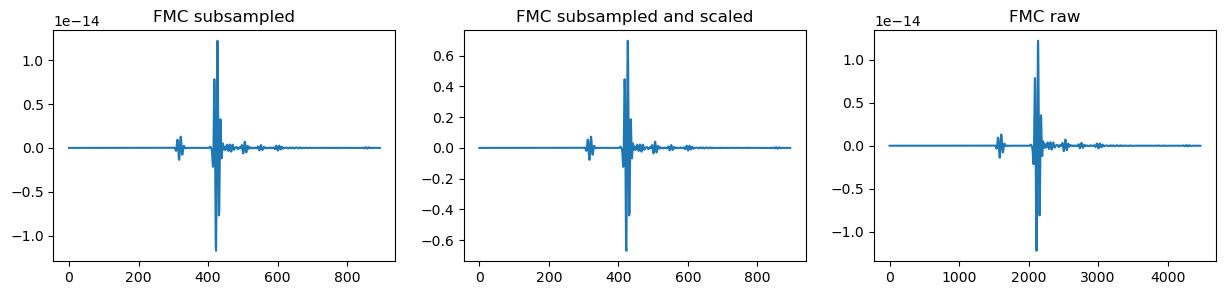

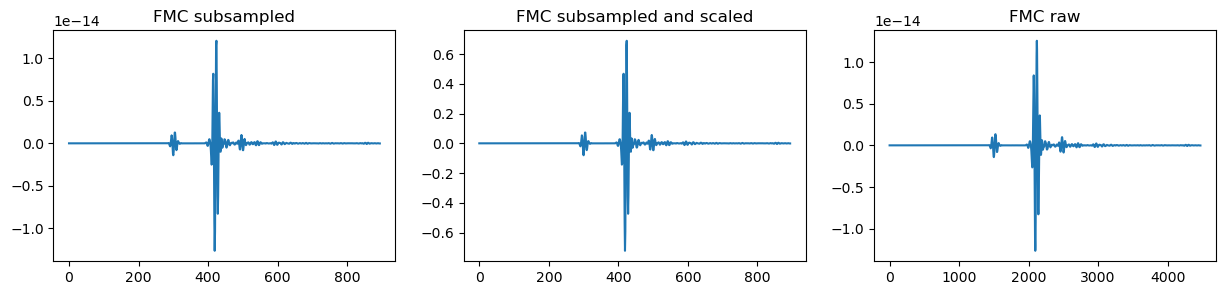

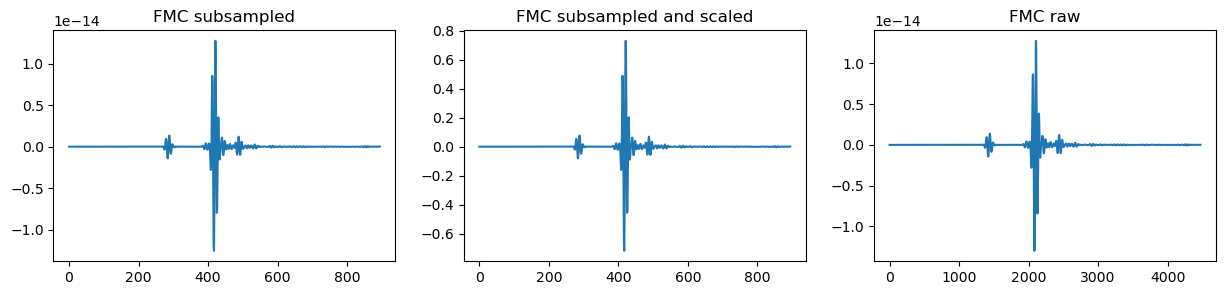

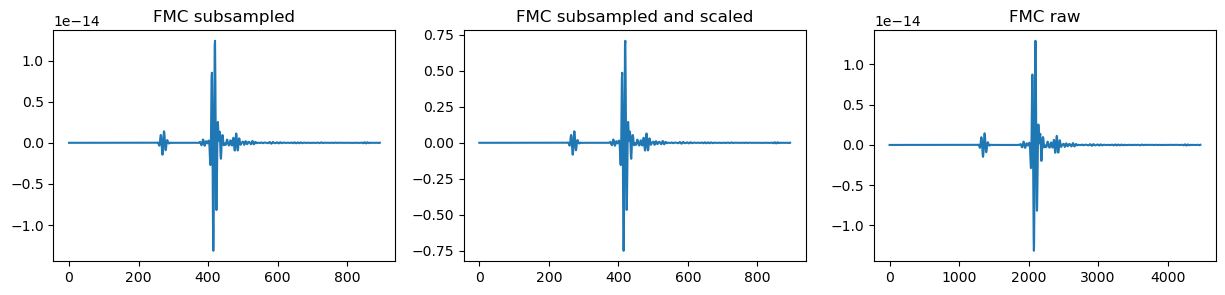

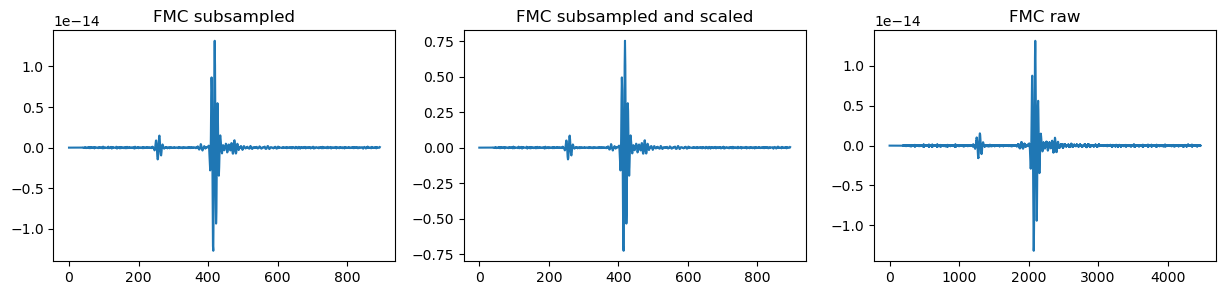

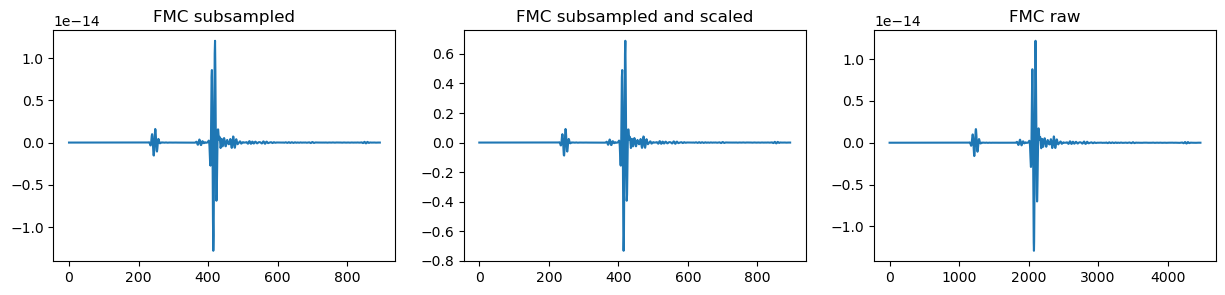

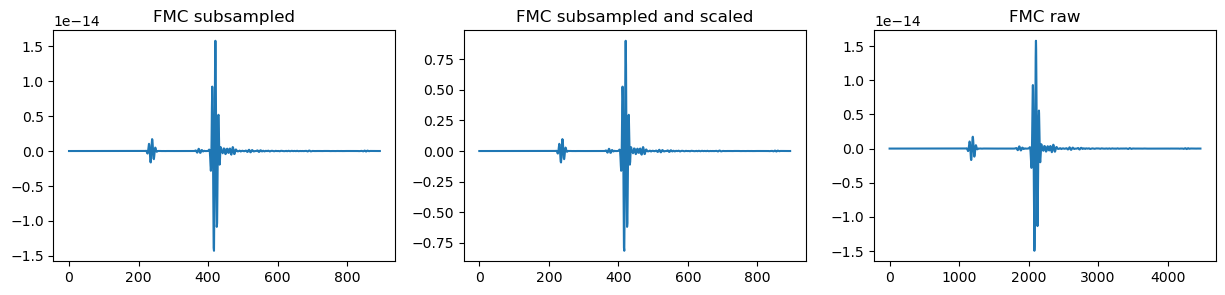

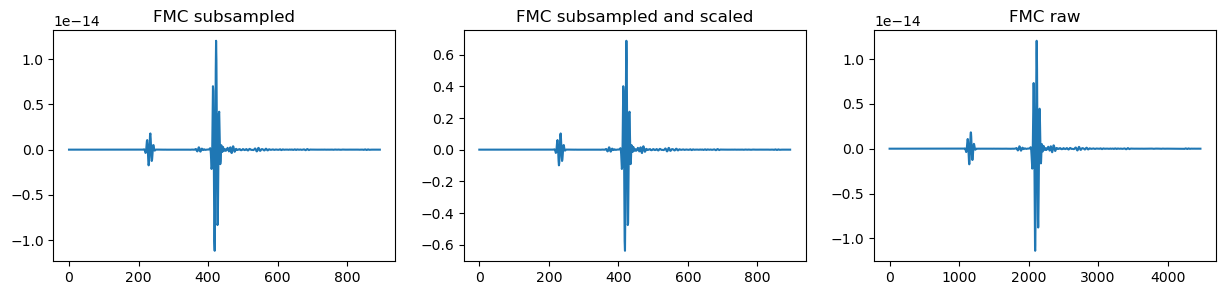

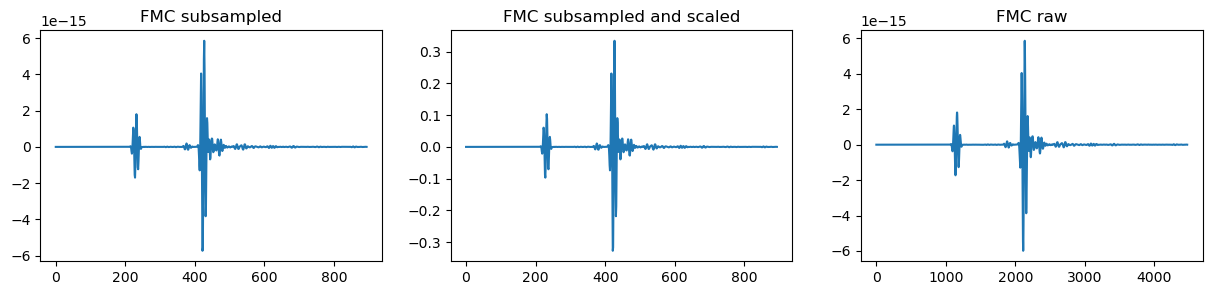

In [20]:
# test whether the data a stored properly

rand_num = random.randint(1,3501)
print(f'Random number is {rand_num}!')

dirName_das_fmc = "/Users/chenkangan/Desktop/ME4_FYP/imageGenerate_2022/DAS_Figure_FMC"
dirName_fmc = "/Users/chenkangan/Desktop/ME4_FYP/imageGenerate_2022/FMC_variable"

index = rand_num + 1
f = plt.figure(figsize=(10,4))

# Read image in greyscale 
image_das_fmc = cv.imread(f'{dirName_das_fmc}/Figure_{index}_fmc.png',cv.IMREAD_GRAYSCALE)  # convert to array
yplot = y[rand_num].astype('float')

scale_percent = 50 # percent of original size
width = int(yplot.shape[1] * scale_percent / 100)
height = int(yplot.shape[0] * scale_percent / 100)
dim = (width, height)

yplot_resize = cv.resize(yplot, dim, interpolation = cv.INTER_AREA)
print(f'Image size after is {yplot_resize.shape} after resizing {scale_percent}%')

ax = f.add_subplot(131)
ax2 = f.add_subplot(132)
ax3 = f.add_subplot(133)
ax.imshow(image_das_fmc, cmap='gray')
ax.axis('off')
ax2.imshow(yplot, cmap='gray')
ax2.axis('off')
ax3.imshow(yplot_resize, cmap='gray')
ax3.axis('off')
plt.show()

fmc_select = X[rand_num]
# print(fmc_select.shape[-1])

# Scale function 
fmc_select_scale = fmc_select / 1.75e-14

filename = f'fmc_{index}.mat'
mat = scipy.io.loadmat(f'{dirName_fmc}/{filename}')
# fmc_raw is not subsampled
fmc_raw = mat['timeTraces']

# plot a random column
rand_col = random.randint(0,15)
print(f'The random column plotted is {rand_col}')

for i in range(0,16):    
    f = plt.figure(figsize=(15,3))
    ax = f.add_subplot(131)
    ax2 = f.add_subplot(132)
    ax3 = f.add_subplot(133)
    ax.set_title('FMC subsampled')
    ax.plot(fmc_select[:,rand_col,i])
    ax2.set_title('FMC subsampled and scaled')
    ax2.plot(fmc_select_scale[:,rand_col,i])
    ax3.set_title('FMC raw')
    ax3.plot(fmc_raw[:,rand_col,i])
    plt.show()


In [68]:
import tensorflow as tf
train_data = train_data[:500]
X, y = [], []
for features, label, index in train_data:
    X.append(features)
    y.append(label)
    
X = np.array(X).reshape(-1, 895, 16, 16, 1)
# X = tf.expand_dims(X, axis=4)
X.shape

(500, 895, 16, 16, 1)

### 3. Load training_data_subsampled_scaled X and y.pickle

In [10]:
pickle_in = open("training_data_subsampled_scaled_y.pickle","rb")
train_data = np.array(pickle.load(pickle_in), dtype=object)
print(f'The shape of entire training dataset: {train_data.shape}')

The shape of entire training dataset: (2000, 180, 240, 1)


# Subsampling Investigation
Using numpy slicing for fast computation:\
https://stackoverflow.com/questions/25876640/subsampling-every-nth-entry-in-a-numpy-array


In [3]:
mat = scipy.io.loadmat('timeTraces.mat')
fmc = mat['timeTraces']
print(list(fmc.shape))
print(type(fmc))

# Best way to subsample
# numpy's slicing, simply start:stop:step
# Sub-sample every 5 data in fmc
fmc_sample = fmc[0::5]

# Bad way to subsample (need to create use extra memory)
# fmc_sample = []
# for i in range(0,list(fmc.shape)[0],5):
#     fmc_sample.append(fmc[i,:,:])
    
# fmc_sample = np.array(fmc_sample)
print(fmc_sample.shape)

[4472, 16, 16]
<class 'numpy.ndarray'>
(895, 16, 16)


### 1. Compare ths subsampled fmc and original fmc

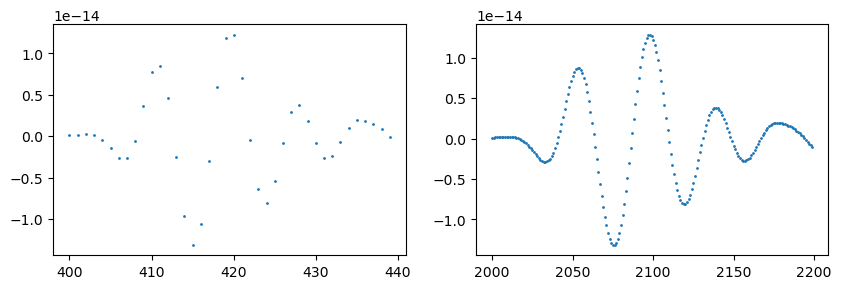

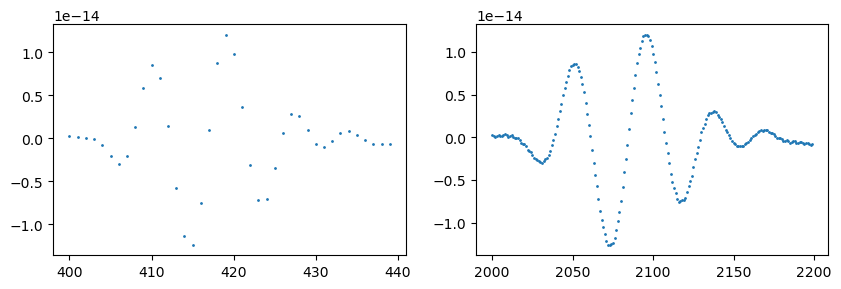

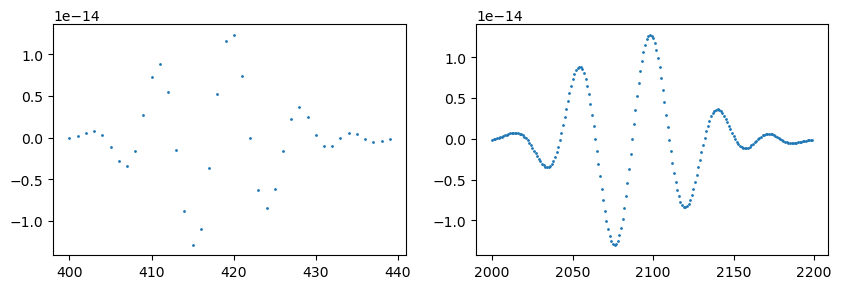

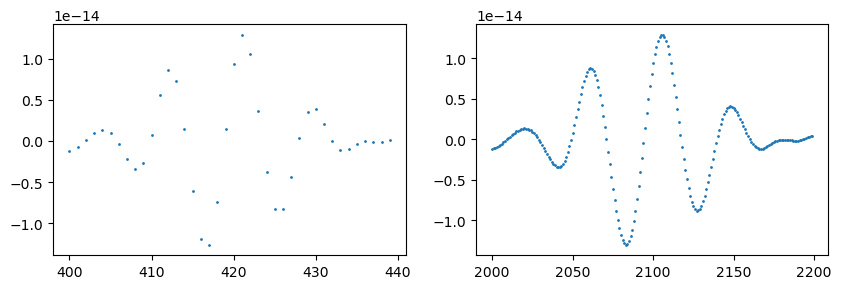

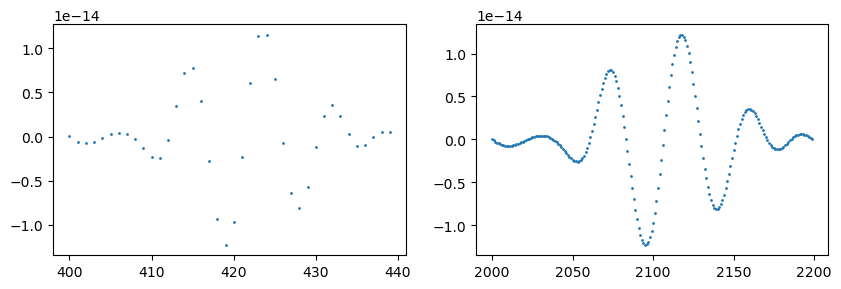

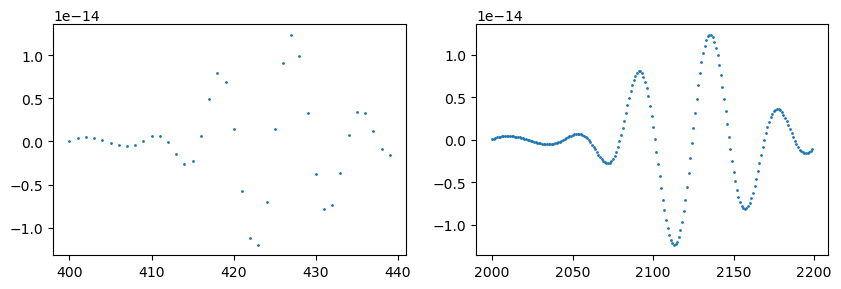

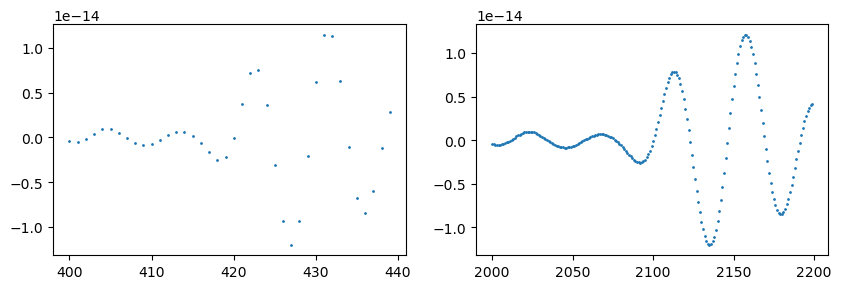

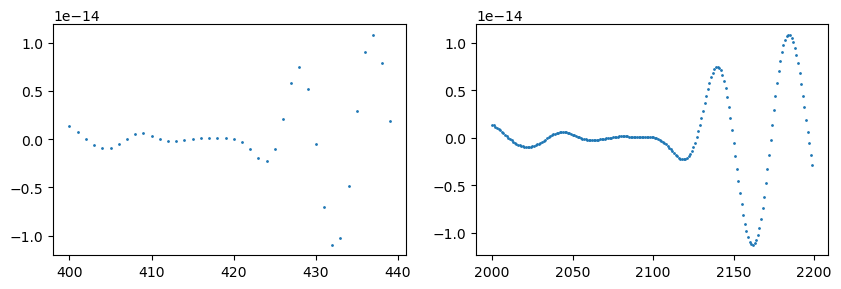

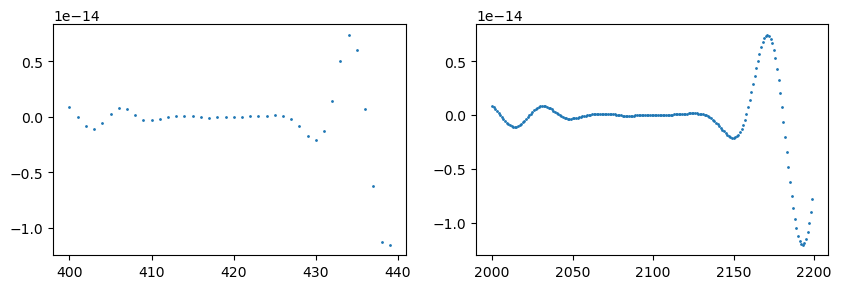

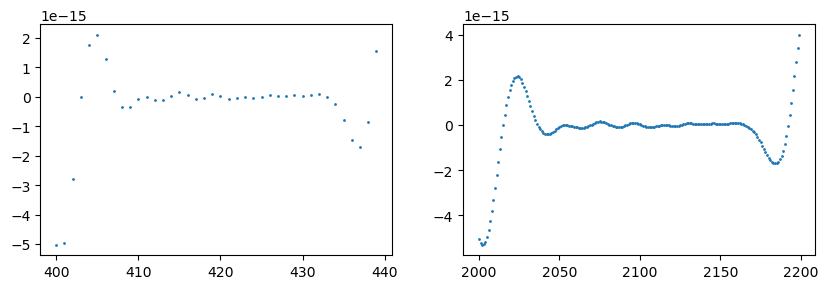

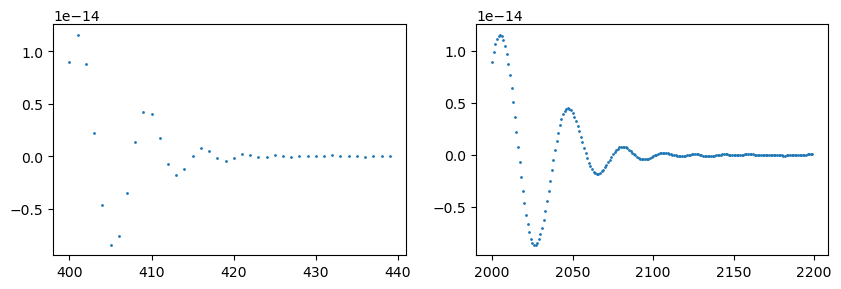

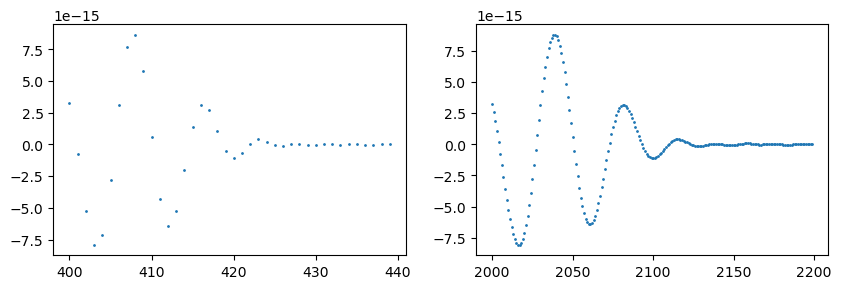

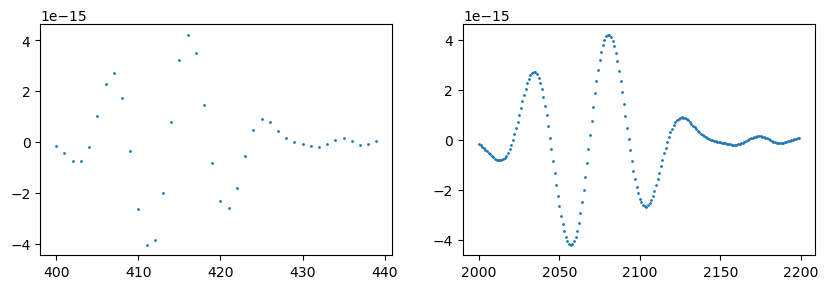

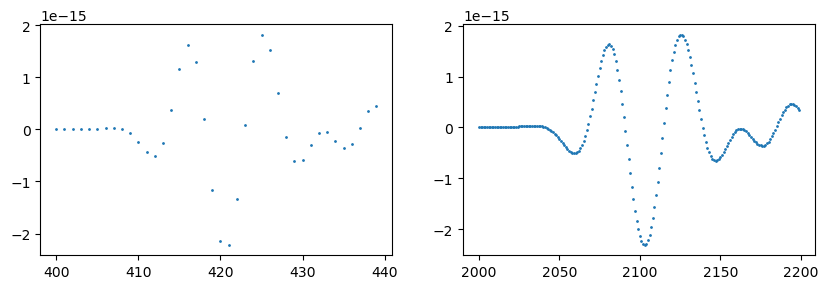

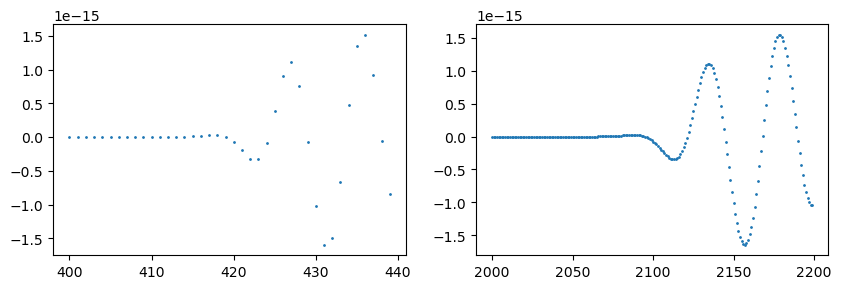

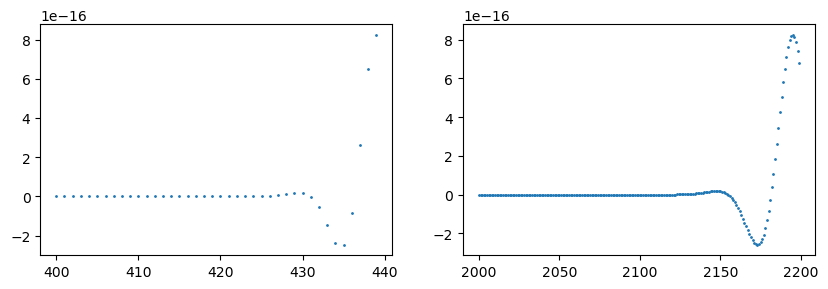

In [5]:
for i in range(0,16):    
    f = plt.figure(figsize=(10,3))
    ax = f.add_subplot(121)
    ax2 = f.add_subplot(122)
    
    index1, index2 = 400, 440
    x1 = np.arange(index1, index2, 1)
    x2 = np.arange(index1*5, index2*5, 1)
    
    ax.scatter(x1, fmc_sample[:,1,i][index1:index2], s = 1)
    ax2.scatter(x2, fmc[:,1,i][index1*5:index2*5], s = 1)
#     ax.plot(x1, fmc_sample[:,1,i][index1:index2])
#     ax2.plot(x2, fmc[:,1,i][index1*5:index2*5])
    plt.show()

# Scaling Investigation

In [6]:
pickle_in = open("training_data_subsampled.pickle","rb")
train_data = np.array(pickle.load(pickle_in), dtype=object)
print(f'The shape of entire training dataset: {train_data.shape}')
print(f'The shape of a dataset: {train_data[1].shape}')
print(f'The shape of a matrix: {train_data[1][0].shape}')
print(f'The shape of an image: {train_data[1][1].shape}')
print(f'The type of an index: {type(train_data[1][2])}')

The shape of entire training dataset: (2000, 3)
The shape of a dataset: (3,)
The shape of a matrix: (895, 16, 16)
The shape of an image: (180, 240)
The type of an index: <class 'int'>


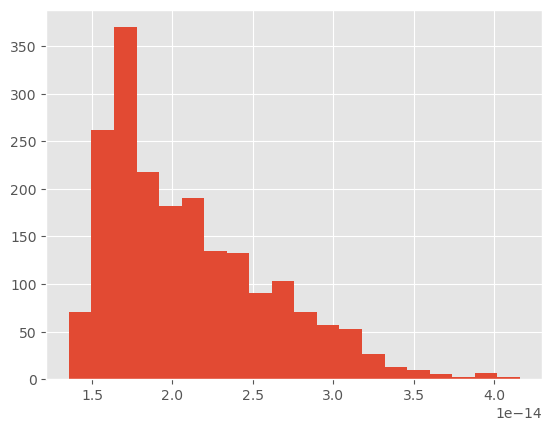

4.158935709060075e-14


In [30]:
fmc = train_data[:,0]

max_num = []
for i in range(len(fmc)):
    max_num.append(np.max(fmc[i]))

# plt.style.use('ggplot')
plt.hist(max_num, bins=20)
plt.show()
print(np.max(max_num))

In [19]:
a = np.array([1,2,3,4,5,6,7,8,9,10,11,12]).reshape(3,2,2)
np.max(a)

12

# Other

(895, 16, 16)
Difference between pair -0.0


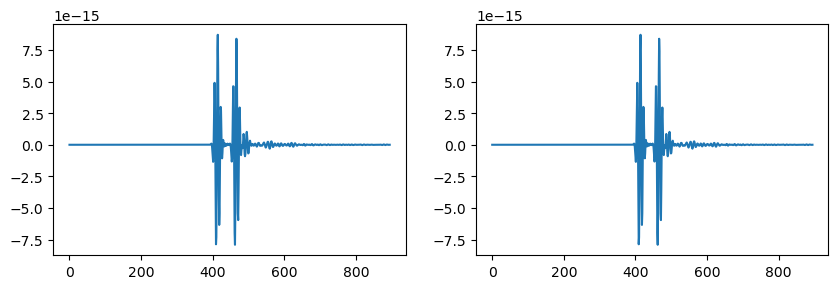

Difference between pair -0.0


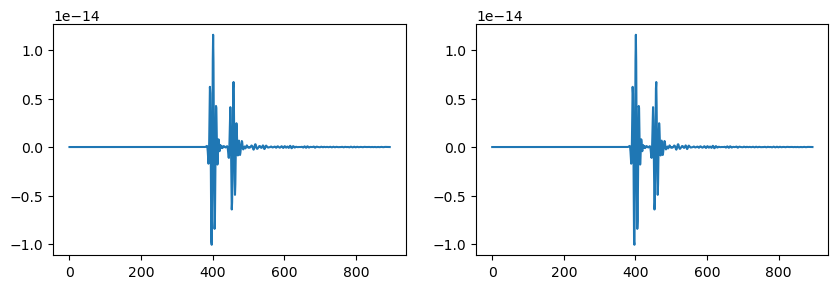

Difference between pair 0.0


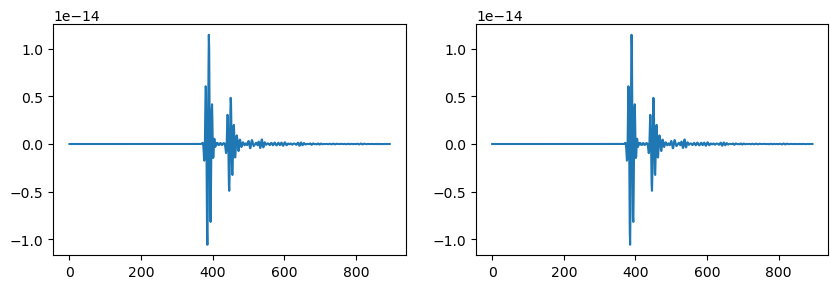

Difference between pair 0.0


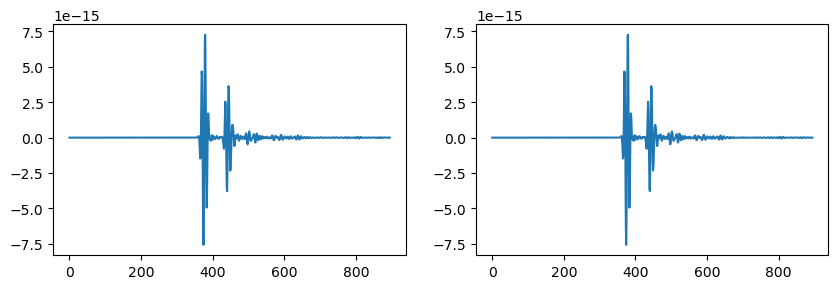

Difference between pair -0.0


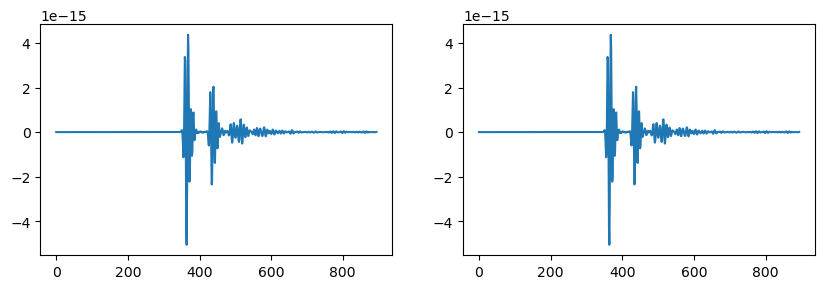

Difference between pair -0.0


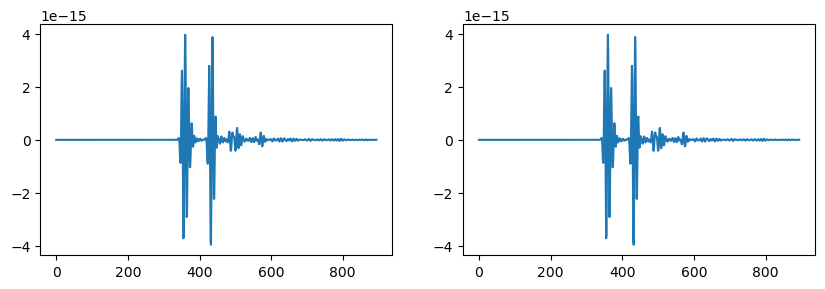

Difference between pair -0.0


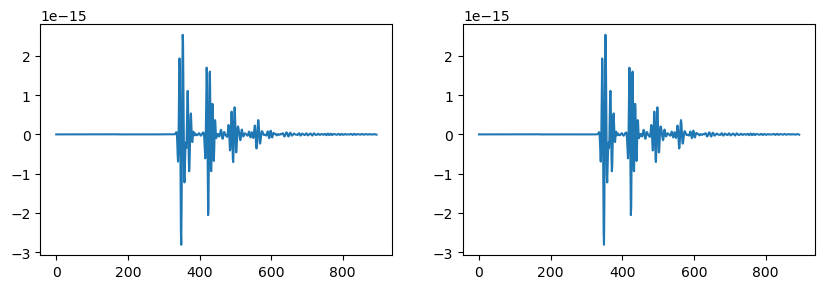

Difference between pair 0.0


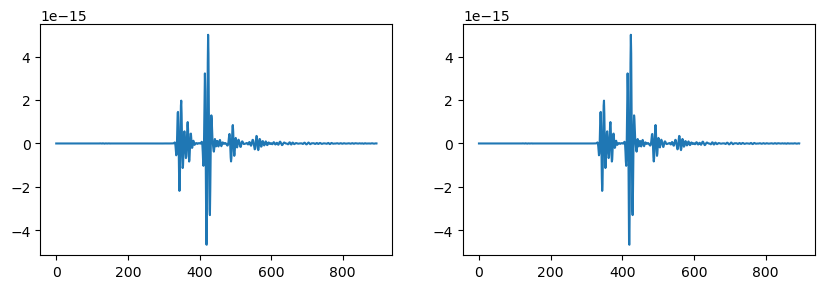

Difference between pair -0.0


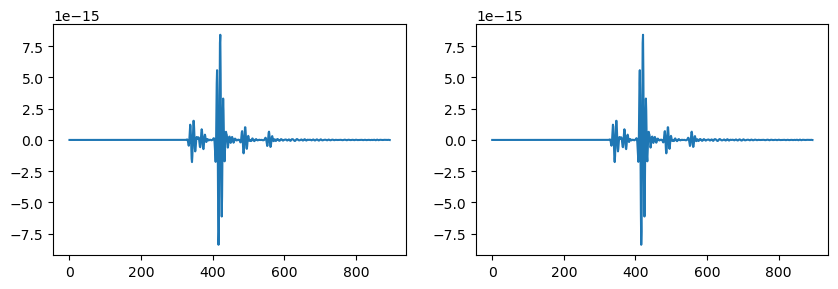

Difference between pair 0.0


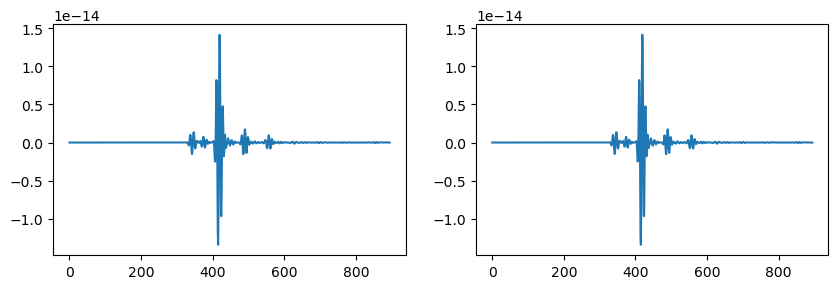

Difference between pair 0.0


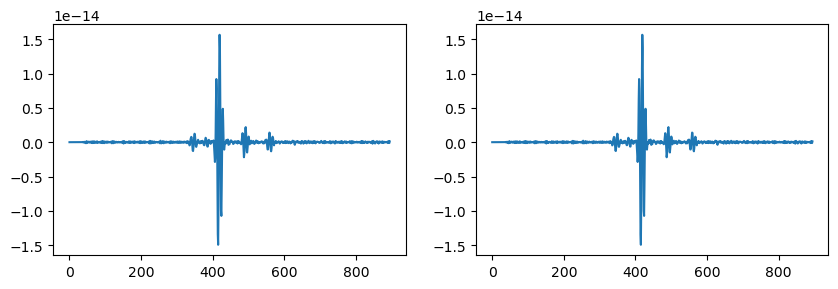

Difference between pair -0.0


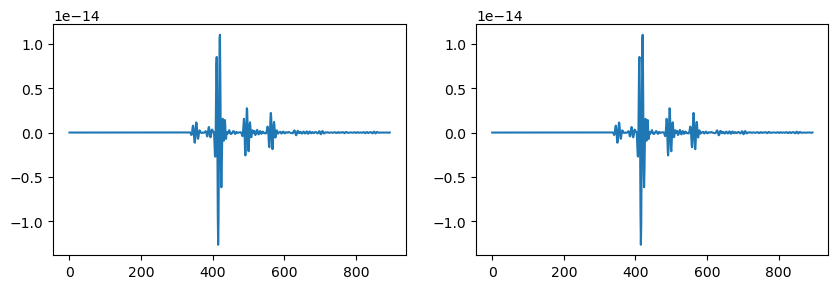

Difference between pair -0.0


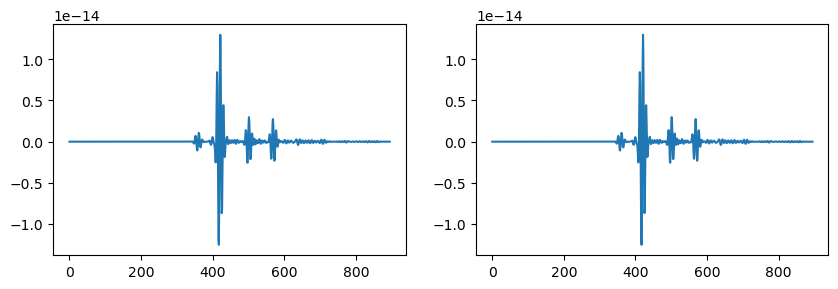

Difference between pair -0.0


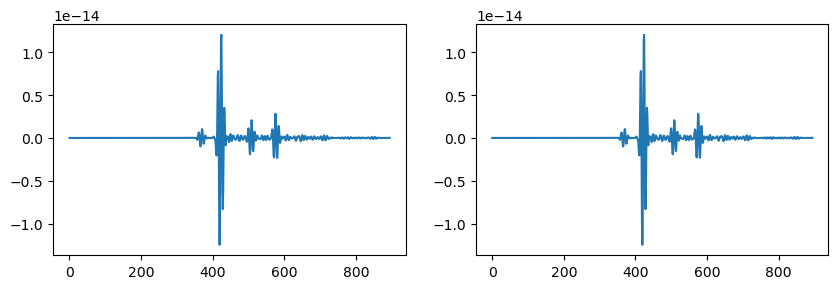

Difference between pair 0.0


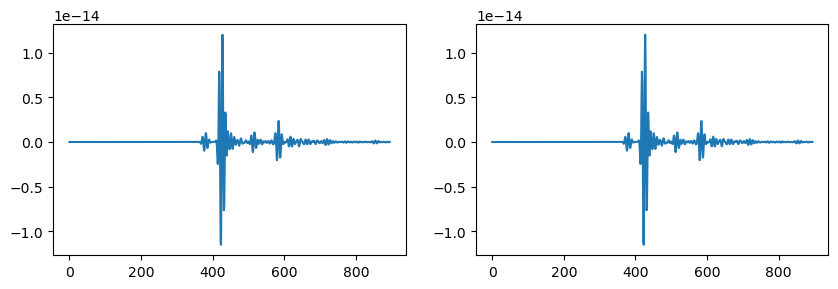

Difference between pair -0.0


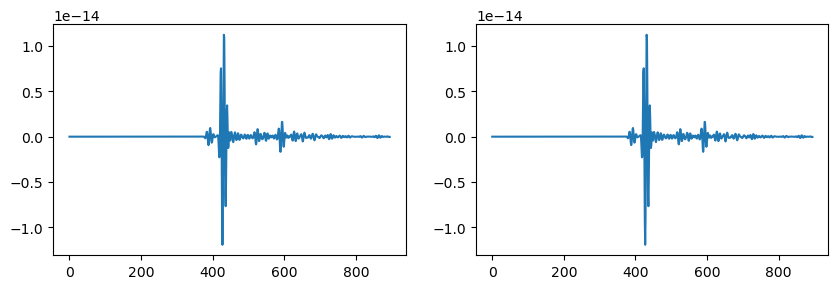

In [17]:
randnum = 10
fmc_sample = fmc[0::5]
print(fmc_sample.shape)

for i in range(0,16): 
    f = plt.figure(figsize=(10,3))
    ax = f.add_subplot(121)
    ax2 = f.add_subplot(122)
    ax.plot(fmc_sample[:,i,randnum])
    ax2.plot(fmc_sample[:,randnum,i])
    diff = np.sum(fmc_sample[:,i,randnum]-fmc_sample[:,randnum,i])
    print(f'Difference between pair {round(diff, 5)}')
    plt.show()

## Image processing using opencv
https://github.com/MC-Kangan/opencv-course

In [14]:
import cv2 as cv
def rescaleFrame(frame, scale=0.75):
    # Images, Videos and Live Video
    width = int(frame.shape[1] * scale)
    height = int(frame.shape[0] * scale)

    dimensions = (width,height)

    return cv.resize(frame, dimensions, interpolation=cv.INTER_AREA)

In [19]:
a = '1/2/3'
a.split('/')[-1]

'3'

## Max

In [10]:
import numpy as np
fmc_csv = np.loadtxt('FMC.csv', delimiter=',')

In [59]:
mat = scipy.io.loadmat('timeTraces.mat')
fmc = mat['timeTraces'].reshape(-1, 256)
(npxf, npyf) = fmc.shape


FMCs = np.zeros((npxf, npyf))
FMCs[:, :] = fmc

print(FMCs.shape)
a = np.expand_dims(FMCs, axis = 2)

(4472, 256)


In [60]:
mat = scipy.io.loadmat('timeTraces.mat')
fmc = mat['timeTraces']
fmc = fmc[0::5] / 1.75e-14
fmc.shape

(895, 16, 16)

## Find the first non-zero element

In [2]:
pickle_in = open("training_data_subsampled_X.pickle","rb")
X = np.array(pickle.load(pickle_in), dtype=object)
print(f'The shape of entire training dataset: {X.shape}')
print(f'The shape of a dataset: {X[1].shape}')

The shape of entire training dataset: (2000, 895, 16, 16, 1)
The shape of a dataset: (895, 16, 16, 1)


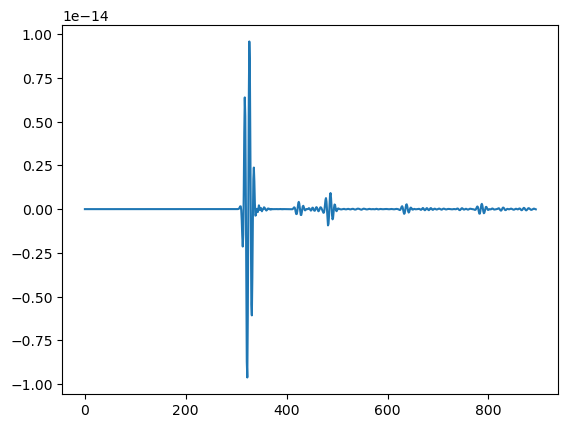

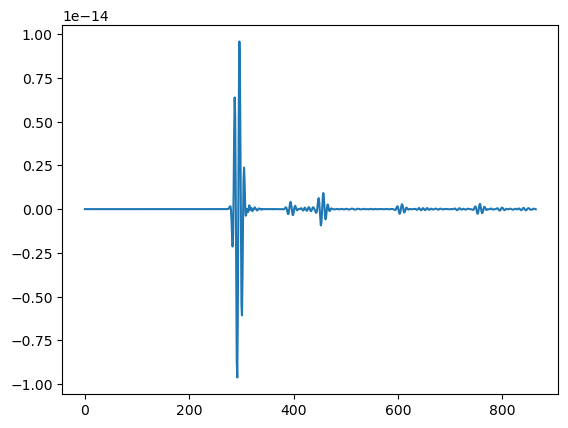

(2000, 895, 16, 16, 1)
(2000, 865, 16, 16, 1)


In [7]:
shrinkX = X[:,30:]
plt.plot(X[30][:,10,1])
plt.show()
plt.plot(shrinkX[30][:,10,1])
plt.show()
print(X.shape)
print(shrinkX.shape)

In [7]:
def find_nonzero(lst):
    front_index = 0
    back_index = 0
    
    for i in range(len(lst)):
        if lst[i] != 0:
            front_index = i
            break
            
    for j in range(0, -len(lst), -1):
        if lst[j] != 0:
            back_index = len(lst)+j
            break
    return front_index, back_index


In [8]:
front_index_list = []
back_index_list = []

X = np.squeeze(X)
for i in range(2000):
    for layer in range(0,16):
        for col in range(0,16):
            front_index, back_index = find_nonzero(X[i][:,col,layer])
            front_index_list.append(front_index)
            back_index_list.append(back_index)


In [13]:
savetxt('front_index_list.csv', front_index_list, delimiter=',')
savetxt('back_index_list.csv', back_index_list, delimiter=',')

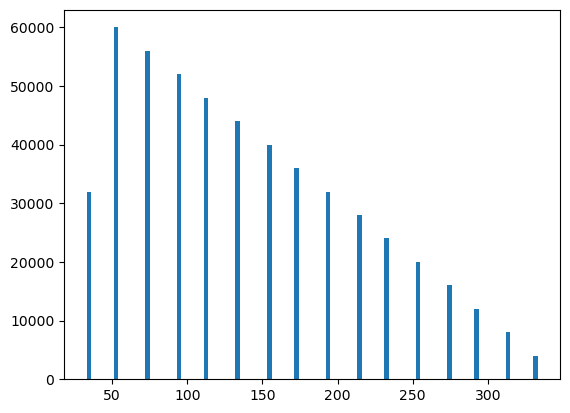

In [86]:
hist = plt.hist(front_index_list, bins = 100)

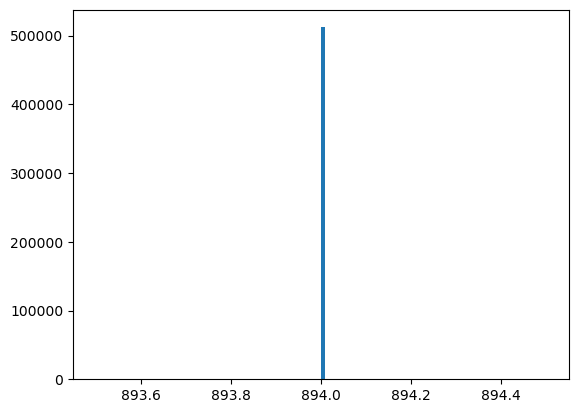

In [87]:
hist = plt.hist(back_index_list, bins = 100)

In [ ]:
pickle_in = open("data_subsampled_no_backwall_crop_y.pickle","rb")
y = np.array(pickle.load(pickle_in), dtype=object)
print(f'The shape of entire training dataset: {y.shape}')
print(f'The shape of a dataset: {y[1].shape}')

In [ ]:
y = y.reshape(-1, 120*240)
y[y==0] = -1
y[y==255] = 1

set(y[0].tolist())